In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import networkx as nx
import itertools
import sqlite3

In [15]:
%matplotlib inline

In [16]:
con = sqlite3.connect("data.sqlite")
sql = "select * from documents_authors;"
X = pd.read_sql(sql, con)

In [17]:
X.head()

,documents_id,authors_id
0,1,1
1,2,2
2,2,3
3,3,4
4,4,5


In [18]:
X.tail()

,documents_id,authors_id
2752,1303,1685
2753,1304,281
2754,1305,475
2755,1305,22
2756,1306,179


In [19]:
Y = X["documents_id"].unique()

In [20]:
Y[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [21]:
x = []
y = {}

uniq = Y

In [22]:
uniq[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [23]:
for article in uniq:
    y[article] = X.loc[X['documents_id'] == article]['authors_id']

In [24]:
n = 0
for article, authors in y.items():
    n += 1
    if n<=5:
        print(article)
        print("")
        print(authors)
        print("----")

1

0    1
Name: authors_id, dtype: int64
----
2

1    2
2    3
Name: authors_id, dtype: int64
----
3

3    4
Name: authors_id, dtype: int64
----
4

4    5
5    6
Name: authors_id, dtype: int64
----
5

6    7
7    8
8    9
Name: authors_id, dtype: int64
----


In [25]:
combinations_all = []

for article in y:
    g = itertools.combinations(y[article], 2)
    for sub in g:
        combinations_all.append(sub)
len(combinations_all)

2243

In [26]:
lis = combinations_all
seen_net = set()
ans_net = []

n=0
for item in lis:
    if item not in seen_net:
        ans_net.append(item)
        seen_net.add(item)
    else:
        n+=1
print("the repeated edges' number: ", n)


matrix_net = np.asarray(ans_net)

matrix_net[:10]



the repeated edges' number:  148


array([[ 2,  3],
       [ 5,  6],
       [ 7,  8],
       [ 7,  9],
       [ 8,  9],
       [11, 12],
       [13, 14],
       [16, 17],
       [16, 18],
       [17, 18]])

In [27]:
seen_tree = set()
ans_tree = []

m=0
for item in lis:
    if item[1] not in seen_tree:
        ans_tree.append(item)
        seen_tree.add(item[1])
    else:
        m+=1
print("the repeated edges' number: ", m)

matrix_tree = np.asarray(ans_tree)
matrix_tree[:10]

the repeated edges' number:  1199


array([[ 2,  3],
       [ 5,  6],
       [ 7,  8],
       [ 7,  9],
       [11, 12],
       [13, 14],
       [16, 17],
       [16, 18],
       [22, 23],
       [25, 26]])

In [28]:
G_n = nx.Graph()
G_n.add_edges_from(matrix_net)
sub_graphs_n = nx.connected_component_subgraphs(G_n)

G_t = nx.Graph()
G_t.add_edges_from(matrix_tree)
sub_graphs_t = nx.connected_component_subgraphs(G_t)

In [29]:
sub_graphs_n = list(sub_graphs_n)
lenn = len(sub_graphs_n)
print(lenn)
sub_graphs_t = list(sub_graphs_t)
lent = len(sub_graphs_t)
print(lent)

294
456


In [32]:
subgraphsize_n = Series()
subgraphsize_t = Series()

for i in range(lenn):
    subgraphsize_n.loc[i] = len(sub_graphs_n[i].nodes())
    
for i in range(lent):
    subgraphsize_t.loc[i] = len(sub_graphs_t[i].nodes())
    
print(subgraphsize_n.head())
print(subgraphsize_t.head(10))


0      2
1     13
2    721
3      2
4      4
dtype: int64
0     2
1     6
2     4
3     2
4     4
5     3
6     3
7     4
8     5
9    16
dtype: int64


In [39]:
pos = nx.spring_layout(sub_graphs_n[4])

{11: <matplotlib.text.Text at 0x11af09c88>,
 12: <matplotlib.text.Text at 0x11af10208>,
 642: <matplotlib.text.Text at 0x11af03908>,
 643: <matplotlib.text.Text at 0x11af10780>}

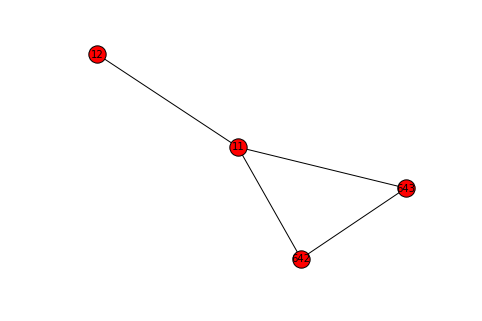

In [40]:
nx.draw(sub_graphs_n[4], pos, node_size = 300)
nx.draw_networkx_labels(sub_graphs_n[4],pos, font_size=10,font_family='sans-serif')


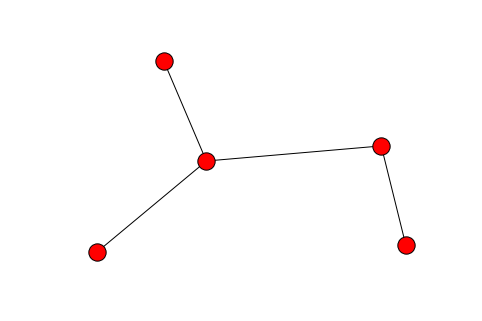

In [37]:
nx.draw(sub_graphs_t[8])

In [3]:
con = sqlite3.connect("data.sqlite")
sql = "select * from documents_authors;"
auth_docu ='''
select full_name, title, count(title)
from authors a, documents b, documents_authors c
where a.id=c.authors_id and c.documents_id=b.id
group by full_name
order by count(title) desc;
'''

In [4]:
X = pd.read_sql(auth_docu, con)


In [13]:
X

,full_name,title,count(title)
0,MIS//Quarterly,Table of Contents,64
1,Izak//Benbasat,Cost/Benefit Analysis of Computer Based Messag...,30
2,Detmar/W./Straub,How Information Technology Governance Mechanis...,18
3,Viswanath//Venkatesh,Mobile Application Usability: Conceptualizati...,18
4,Ron//Weber,A Hole in the Whole: A Response to Allen and ...,16
5,Carol//Saunders,When Imprecise Statistical Statements Become P...,15
6,Varun//Grover,"Me. My Self, and I(T): Conceptualizating Info...",14
7,Blake//Ives,Chargeback Systems and User Involvement in Inf...,13
8,Arun//Rai,Editor's Comments: The MIS Quarterly Trifecta...,12
9,Paul/A./Pavlou,Swift Guanxi in Online Marketplaces: The Role...,12


In [12]:
X.ix[1].title


'Cost/Benefit Analysis of Computer Based Message Systems'